Statistics Project

To analyze customer behavior using statistical and mathematical tools in Python, to
identify factors affecting customer retention and churn.
Get the dataset from :
https://drive.google.com/file/d/1VX-LFyvlpQf7T_6lMnco0DKn6-5PtA1q/view?usp=
drive_link
Dataset Description:
Assume a dataset with the following columns:
1. CustomerID
2. Gender
3. Region
4. PurchaseAmount
5. ProductCategory
6. Churn (Yes/No)
7. CampaignGroup (A/B)
Questions
1. What is the average, median, and mode of PurchaseAmount?
2. Are there any outliers in the PurchaseAmount data?
3. Is there any skewness or kurtosis in the PurchaseAmount distribution?
4. Is there a significant difference in spending between male and female
customers?
5. Is there a relationship between ProductCategory and customer churn?
6. Does PurchaseAmount vary significantly across different regions?
7. Which email campaign (A or B) performed better in terms of average
PurchaseAmount?
8. Can we assume PurchaseAmount follows a normal distribution?
9. What insights can we gain by applying the Central Limit Theorem?
10.What is the 95% confidence interval for the average PurchaseAmount?

In [245]:
import pandas as pd 
import numpy as np 
from scipy import stats 
# from statsmodel.formula.api import ols 
from scipy.stats import chi2_contingency 
import matplotlib.pyplot as plt 
import seaborn as sns 



In [246]:
cust = pd.read_csv(r'C:\Users\jasmi\Downloads\ML Classes\capstone_3_Statistics\customer_behavior.csv')
cust.head()
cust.dtypes
type(cust)

pandas.core.frame.DataFrame

In [247]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       5000 non-null   int64  
 1   Gender           4903 non-null   object 
 2   Region           4825 non-null   object 
 3   PurchaseAmount   4850 non-null   float64
 4   ProductCategory  4474 non-null   object 
 5   Churn            4735 non-null   object 
 6   CampaignGroup    4815 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 273.6+ KB


In [248]:
cust_cleaned=cust.dropna(subset=['Gender','Region','ProductCategory','Churn','CampaignGroup'])
cust_cleaned

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
0,1001,Male,South,256.07,Fashion,No,A
1,1002,Female,South,NaN,Electronics,Yes,B
2,1003,Female,West,1194.41,Fashion,No,A
3,1004,Female,South,413.06,Grocery,No,A
4,1005,Male,West,1556.32,Fashion,Yes,A
...,...,...,...,...,...,...,...
4993,5994,Female,West,614.50,Fashion,No,B
4994,5995,Male,North,825.77,Fashion,No,A
4995,5996,Female,West,1497.00,Electronics,Yes,B
4996,5997,Male,West,978.87,Fashion,Yes,A


<Axes: xlabel='PurchaseAmount', ylabel='Count'>

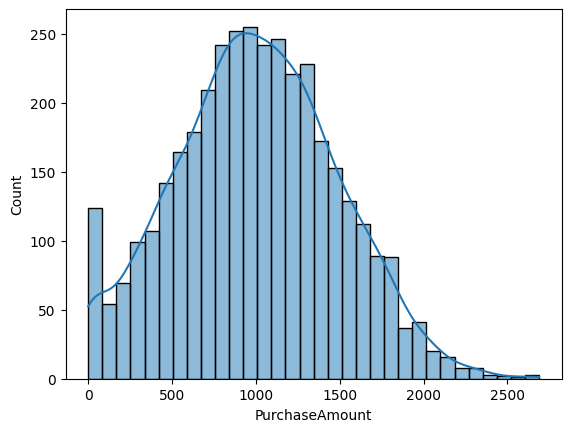

In [249]:
#From 5000 custoemr information gender region productcategory churn are having null values..so,dropping that one.for the product
#category we can find the mean based on gender region and product catgory.for the proper analysis on A/B testing, forced to remove thoe rows also.
#so only around 3835 rows are there for proper analysis
sns.histplot(data=cust_cleaned,x=cust_cleaned['PurchaseAmount'],kde=True)
#Its like a normal distribution.From the plot ,i can see the mean will be around 1000

In [250]:
#1. What is the average, median, and mode of PurchaseAmount
purchaseamount_mean=cust_cleaned['PurchaseAmount'].mean()
purchaseamount_median=cust_cleaned['PurchaseAmount'].median()
purchaseamount_mode=cust_cleaned['PurchaseAmount'].mode()
print(purchaseamount_mean,purchaseamount_median,purchaseamount_mode)

1001.153671601615 996.15 0    0.0
Name: PurchaseAmount, dtype: float64


In [251]:
zero_counts=(cust_cleaned['PurchaseAmount']==0.0).sum()
zero_counts
#Total 84 rows with purchaseamount as 0.0.theses rows are no longer valueable

np.int64(84)

<Axes: xlabel='PurchaseAmount'>

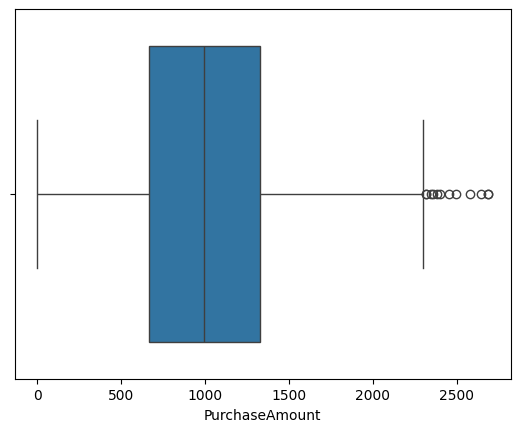

In [252]:
# 2. Are there any outliers in the PurchaseAmount data?
sns.boxplot(data=cust_cleaned,x='PurchaseAmount')

In [253]:
cust_cleaned_2500=cust_cleaned[cust_cleaned['PurchaseAmount']>2500]
cust_cleaned_2500 
## Yes,there are few outliers.we can consider thevalue >2500 as outliers.Also we cannot say it completely as some of the electronics and grocey items
##purchased by the customers may vary.may be a lot.it depends on the several other matters too

,CustomerID,Gender,Region,PurchaseAmount,ProductCategory,Churn,CampaignGroup
348,1349,Male,South,2688.69,Electronics,Yes,A
826,1827,Male,East,2578.89,Electronics,Yes,B
3438,4439,Female,East,2688.88,Grocery,No,B
3564,4565,Male,East,2643.88,Electronics,Yes,B


In [254]:


q25 = cust_cleaned['PurchaseAmount'].quantile(0.25)
q50 = cust_cleaned['PurchaseAmount'].quantile(0.50)
q75 = cust_cleaned['PurchaseAmount'].quantile(0.75)
q85 = cust_cleaned['PurchaseAmount'].quantile(0.85)
q100 = cust_cleaned['PurchaseAmount'].quantile(1.00)
print(q25,q50,q75,q85,q100)

668.435 996.15 1326.71 1512.2490000000003 2688.88


3. Is there any skewness or kurtosis in the PurchaseAmount distribution?
No i didnt see any visible skewness in the purchaseamount data

In [255]:
#4. Is there a significant difference in spending between male and female
#customers?

cust_cleaned[['PurchaseAmount','Gender']].head()

cust_cleaned_gender=cust_cleaned.groupby('Gender')['PurchaseAmount'].mean()
cust_cleaned_gender

# By the mean ,a small variation is there in spending.male is spending more than Female by 2.7%

Gender
Female     987.988670
Male      1014.212788
Name: PurchaseAmount, dtype: float64

In [256]:
#5. Is there a relationship between ProductCategory and customer churn?
cust_cleaned['Churn'] = cust_cleaned['Churn'].map({'Yes': 1, 'No': 0})
cust_cleaned = cust_cleaned.dropna(subset=['Churn'])

churn_summary = cust_cleaned.groupby('ProductCategory')['Churn'].mean()

print(churn_summary)
#Fashion production category significantly high churned rate ie 41.9%,then comes Grocery 40.9% and then comesElectronics.
# (overall 40% churn from all,so there is no signofocant difference)
#OR usin ch-sqaure test
import pandas as pd
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(cust_cleaned['ProductCategory'], cust_cleaned['Churn'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)

alpha = 0.05
if p <= alpha:
    print(" Reject the null hypothesis: There is a significant relationship between ProductCategory and Churn.")
else:
    print("Fail to reject the null hypothesis: No significant relationship between ProductCategory and Churn.")


ProductCategory
Electronics    0.406198
Fashion        0.419453
Grocery        0.409057
Name: Churn, dtype: float64
Churn              0    1
ProductCategory          
Electronics      709  485
Fashion          764  552
Grocery          783  542
Chi-Square Statistic: 0.5140373035857669
P-value: 0.7733537891962257
Fail to reject the null hypothesis: No significant relationship between ProductCategory and Churn.


C:\Users\jasmi\AppData\Local\Temp\ipykernel_3720\1427072012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_cleaned['Churn'] = cust_cleaned['Churn'].map({'Yes': 1, 'No': 0})


In [257]:
#6. Does PurchaseAmount vary significantly across different regions?
cust_cleaned[['PurchaseAmount','Region']].head()

cust_cleaned_gender=cust_cleaned.groupby('Region')['PurchaseAmount'].mean()
cust_cleaned_gender
#East>North>South>West,there is no significant difference seen only minute chnage ie negligible
# OR using Anova




Region
East     1010.034773
North    1009.935265
South    1001.362230
West      982.440335
Name: PurchaseAmount, dtype: float64

In [258]:
cust_cleaned_filtered = cust_cleaned[cust_cleaned['PurchaseAmount'] > 0].dropna(subset=['PurchaseAmount', 'Region'])
cust_cleaned_filtered['Region'].value_counts()
from scipy import stats

groups = [group['PurchaseAmount'].values 
          for name, group in cust_cleaned_filtered.groupby('Region') 
          if len(group) > 1]

f_stat, p_val = stats.f_oneway(*groups)

print("F-statistic:", f_stat)
print("P-value:", p_val)

alpha = 0.05
if p_val <= alpha:
    print("Reject the null hypothesis: PurchaseAmount varies significantly across regions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PurchaseAmount across regions.")


F-statistic: 0.6424486285771452
P-value: 0.5876744547935138
Fail to reject the null hypothesis: No significant difference in PurchaseAmount across regions.


In [259]:
  cust_cleaned.groupby('Region')['PurchaseAmount'].describe()

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
East,949.0,1010.034773,494.383390,0.0,673.1300,1007.35,1336.490,2688.88
North,925.0,1009.935265,464.530592,0.0,713.1500,999.70,1302.770,2357.41
South,946.0,1001.362230,486.840723,0.0,651.4325,1005.27,1340.515,2688.69
West,895.0,982.440335,488.136602,0.0,642.7100,971.58,1329.665,2384.19


In [ ]:
#7. Which email campaign (A or B) performed better in terms of average
#PurchaseAmount?
cust_cleaned[['CampaignGroup', 'PurchaseAmount']].head()
avg_purchase = cust_cleaned.groupby('CampaignGroup')['PurchaseAmount'].mean()
print(avg_purchase)
# There is no such drastic perforance change in it.campaign A shows little bit better

#OR using ttest,below one


CampaignGroup
A    1010.275083
B     992.017516
Name: PurchaseAmount, dtype: float64


In [265]:

from scipy import stats
import pandas as pd

# cust_cleaned['CampaignGroup'] = cust_cleaned['CampaignGroup'].str.strip().str.upper()
# cust_cleaned['PurchaseAmount'] = pd.to_numeric(cust_cleaned['PurchaseAmount'], errors='coerce')

campaign_A = cust_cleaned.loc[cust_cleaned['CampaignGroup'] == 'A', 'PurchaseAmount']
campaign_B = cust_cleaned.loc[cust_cleaned['CampaignGroup'] == 'B', 'PurchaseAmount']

campaign_A = campaign_A[campaign_A > 0].dropna()
campaign_B = campaign_B[campaign_B > 0].dropna()


t_stat, p_value = stats.ttest_ind(campaign_A, campaign_B)
print("T-statistic:", t_stat)
print("P-value:", p_value)

alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in PurchaseAmount between Campaign A and B.")
else:
    print("Fail to reject the null hypothesis: No significant difference in PurchaseAmount between Campaign A and B.")




T-statistic: 1.1365897111108638
P-value: 0.2557848896226692
Fail to reject the null hypothesis: No significant difference in PurchaseAmount between Campaign A and B.


In [262]:
# 8. Can we assume PurchaseAmount follows a normal distribution?
# Yes,its following normal distribution

In [263]:
#9. What insights can we gain by applying the Central Limit Theorem?
#The mean of this sampling distribution is approximately equals to the true population mean.

In [ ]:
#10.What is the 95% confidence interval for the average PurchaseAmount?

from scipy import stats

mean = np.mean(cust_cleaned['PurchaseAmount'])
std = np.std(cust_cleaned['PurchaseAmount'], ddof=1)  # sample std
n = len(cust_cleaned['PurchaseAmount'])

confidence_interval = stats.t.interval(0.95, df=n-1, loc=mean, scale=std/np.sqrt(n))
print(f"95% Confidence Interval: {confidence_interval}")

# 95% confidence interval for the average PurchaseAmount is between 985.8435216230214 and 1016.4638215802086


95% Confidence Interval: (np.float64(985.8435216230214), np.float64(1016.4638215802086))
